In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

housing.head(10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [3]:
housing.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


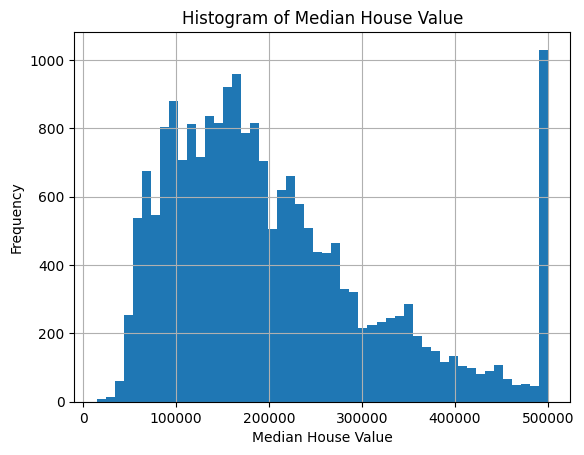

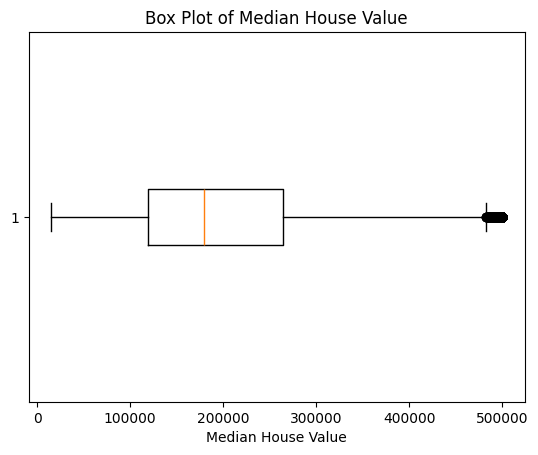

In [5]:
import matplotlib.pyplot as plt

# Histogram
plt.figure()
housing["median_house_value"].hist(bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Median House Value")
plt.show()

# Box plot
plt.figure()
plt.boxplot(housing["median_house_value"], vert=False)
plt.xlabel("Median House Value")
plt.title("Box Plot of Median House Value")
plt.show()


In [6]:
missing_count = housing.isnull().sum()
missing_percentage = (missing_count / len(housing)) * 100

missing_data = pd.DataFrame({
    "Missing_Count": missing_count,
    "Missing_Percentage": missing_percentage
})

missing_data


,Missing_Count,Missing_Percentage
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing["total_bedrooms"] = imputer.fit_transform(
    housing[["total_bedrooms"]]
)

In [8]:
housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"])

housing_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [9]:
from sklearn.preprocessing import MinMaxScaler

X = housing_encoded.drop("median_house_value", axis=1)
y = housing_encoded["median_house_value"]

numeric_cols = X.select_dtypes(include=["float64", "int64"]).columns

minmax_scaler = MinMaxScaler(feature_range=(0, 1))
X[numeric_cols] = minmax_scaler.fit_transform(X[numeric_cols])


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

housing_encoded["income_cat"] = pd.cut(
    housing_encoded["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Stratified split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(housing_encoded, housing_encoded["income_cat"]):
    strat_train_set = housing_encoded.loc[train_idx].drop("income_cat", axis=1)
    strat_test_set = housing_encoded.loc[test_idx].drop("income_cat", axis=1)

strat_train_set.shape, strat_test_set.shape


((16512, 14), (4128, 14))

In [11]:
# Correlation matrix (numerical features only)
corr_matrix = strat_train_set.corr()

corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076335,0.108071,0.063146,-0.019615,-0.047466,0.318160,-0.054733,0.006436,-0.475898,0.052194
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072213,-0.115290,-0.077765,-0.075146,-0.142673,-0.444080,0.350742,-0.011606,0.358881,-0.167113
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.323835,-0.298737,-0.306473,-0.111315,0.114146,0.048905,-0.243223,0.010369,0.258548,0.022243
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.926347,0.855103,0.918396,0.200133,0.135140,0.001089,0.023986,-0.005585,-0.027584,-0.008845
total_bedrooms,0.076335,-0.072213,-0.323835,0.926347,1.000000,0.871876,0.974541,-0.009419,0.047732,0.024439,-0.009142,-0.003522,-0.026171,0.001237
population,0.108071,-0.115290,-0.298737,0.855103,0.871876,1.000000,0.904639,0.002421,-0.026882,0.077911,-0.022377,-0.006498,-0.065896,-0.022142
households,0.063146,-0.077765,-0.306473,0.918396,0.974541,0.904639,1.000000,0.010869,0.064590,0.048127,-0.042293,-0.005713,-0.016036,0.002781
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009419,0.002421,0.010869,1.000000,0.687151,0.167555,-0.233741,-0.006686,0.054898,0.025384
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047732,-0.026882,0.064590,0.687151,1.000000,0.259521,-0.482853,0.013708,0.158691,0.137332
ocean_proximity_<1H OCEAN,0.318160,-0.444080,0.048905,0.001089,0.024439,0.077911,0.048127,0.167555,0.259521,1.000000,-0.607095,-0.009770,-0.315029,-0.341063


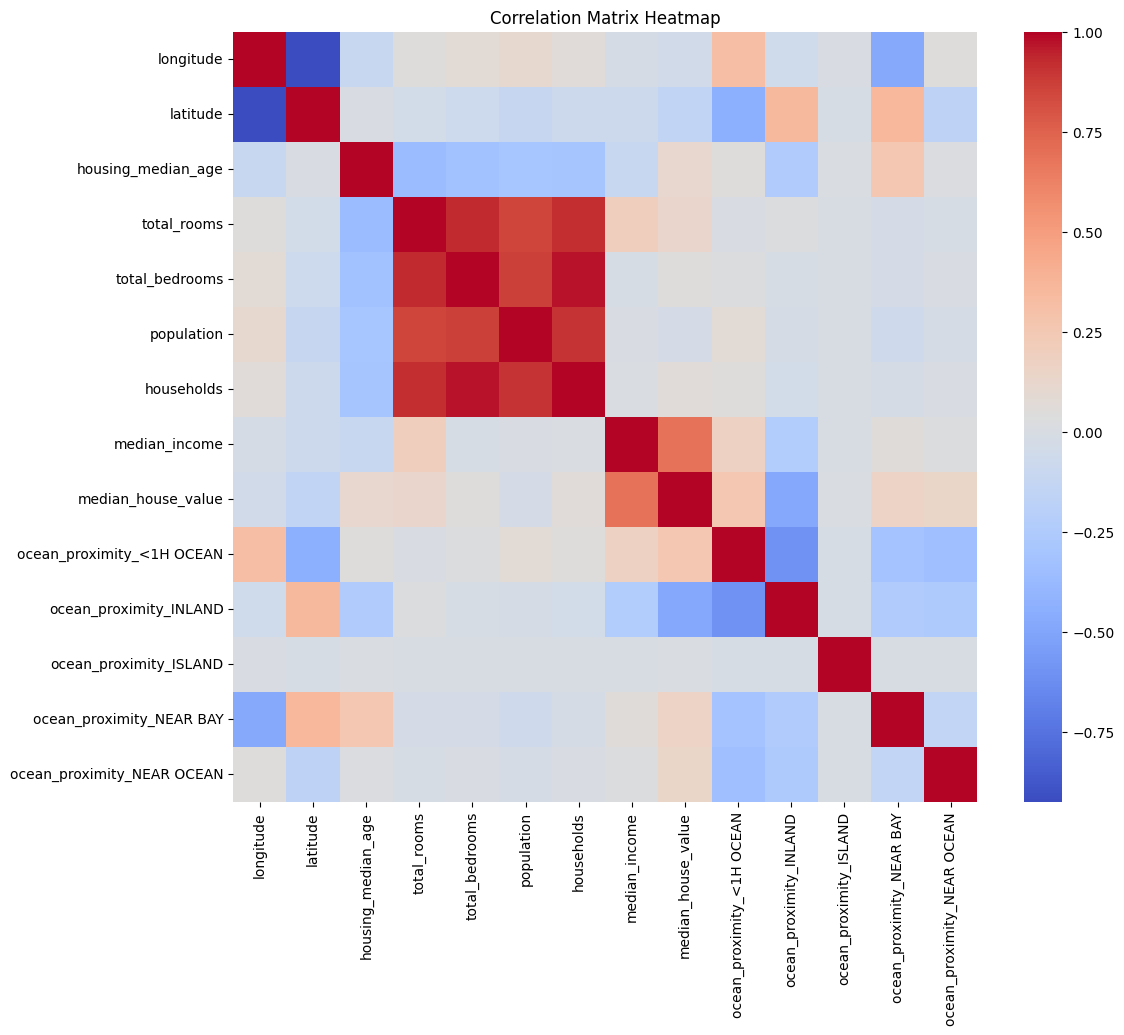

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()


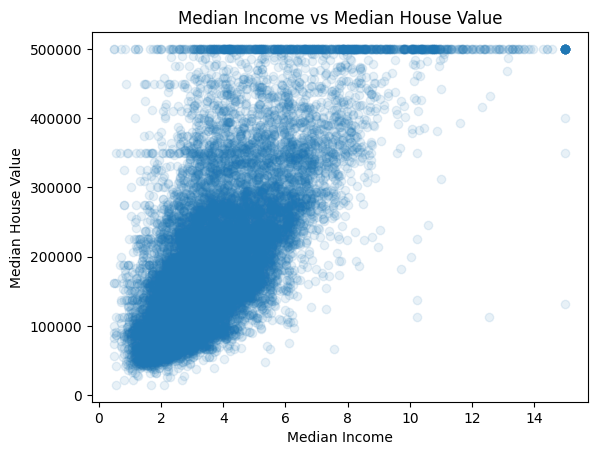

In [13]:
plt.figure()
plt.scatter(
    strat_train_set["median_income"],
    strat_train_set["median_house_value"],
    alpha=0.1
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()


In [14]:
train_set, test_set = train_test_split(
    housing_encoded,
    test_size=0.2,
    random_state=42
)

train_set.shape, test_set.shape


((16512, 15), (4128, 15))

In [15]:
target_corr = train_set.corr()["median_house_value"].sort_values(ascending=False)

top_3_positive = target_corr[1:4]

# Most negative correlation
most_negative = target_corr.iloc[-1]

top_3_positive, most_negative


(median_income                0.690647
 income_cat                   0.646710
 ocean_proximity_<1H OCEAN    0.258544
 Name: median_house_value, dtype: float64,
 np.float64(-0.48286185086216477))

In [16]:
from sklearn.preprocessing import StandardScaler

X = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"]

num_cols = X.select_dtypes(include=["float64", "int64"]).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression()

In [18]:
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"]

X_test[num_cols] = scaler.transform(X_test[num_cols])

y_pred = lin_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2

(np.float64(70040.67679908364), 50857.043017429016, 0.6256362335780752)